In [29]:
import tensorflow as tf
import numpy as np
import os
from skimage.filters import gaussian

import matplotlib.pyplot as plt

In [2]:
root_path = '/mnt/d/cardimagescans'
set_codes = ['khm']

In [30]:
def parse_function(filename, label):
    image_string = tf.read_file(filename)
    img = tf.image.decode_png(image_string, channels = 3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    return img, label

def preprocess_images(image, label):
    img = tf.image.random_brightness(image, max_delta=0.6)
    img = tf.image.random_contrast(img, 0.2, 3.0)
    img = tf.image.random_jpeg_quality(img, 20, 80)

    img = gaussian(img, sigma=np.random.choice(range(1,10)))
    img = tf.clip_by_value(img, 0.0, 1.0)
    img = tf.image.resize(img, [385, 275])
    img = tf.image.random_crop(img, [350, 250, 3])
    return img, label

def get_card_paths(root_path, set_codes):
    card_paths = []
    for s in set_codes:
        set_path = os.listdir(os.path.join(root_path, s))
        for card in set_path:
            card_paths.append(os.path.join(root_path, s, card))
    return card_paths


/home/jomann/anaconda3/envs/cardrecognition/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  # This is added back by InteractiveShellApp.init_path()


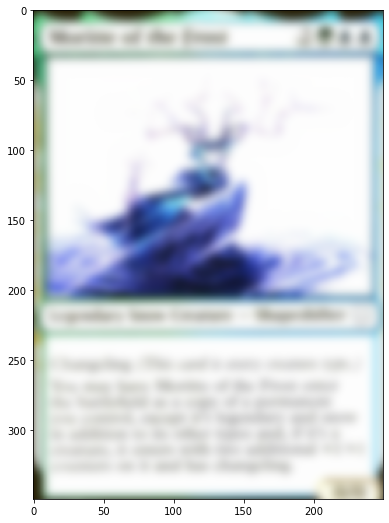

In [60]:
paths = get_card_paths(root_path, set_codes)

img = tf.io.read_file(paths[42])
tf
img = tf.image.decode_png(img, 3)
img = tf.image.convert_image_dtype(img, tf.float32)
img = tf.image.random_brightness(img, max_delta=0.8)
img = tf.image.random_contrast(img, 0.2, 3.0)
img = tf.image.random_jpeg_quality(img, 20, 80)

img = gaussian(img, sigma=np.random.choice(range(1,10)))
img = tf.clip_by_value(img, 0.0, 1.0)
img = tf.image.resize(img, [385, 275])
img = tf.image.random_crop(img, [350, 250, 3])

plt.figure(figsize=(12,9))
plt.imshow(img)

In [39]:
np.divide([1040, 745], [3.5, 2.5])

array([297.14285714, 298.        ])